In [1]:
import numpy as np
import pandas as pd
from DL_Lib import data_load, CouplingLayer, RealNVP, train, test, sample
import torch
from torch import nn, optim, distributions
from torch.nn import functional as F
from torchvision import transforms
from torchvision.utils import save_image
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from pylab import rcParams
import os
[_,weekend,_]=data_load()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

C:\Users\ibeis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (3,4,5,6,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [2]:
rcParams['figure.figsize'] = 8, 8
plt.ion()
train_weekend, test_weekend=train_test_split(weekend,test_size=0.2,shuffle=True)
train_weekend=train_weekend.astype(np.float32)
test_weekend=test_weekend.astype(np.float32)

BATCH_SIZE = 128

EPOCHS = 100
INPUT_DIM = 2
OUTPUT_DIM = 2
HIDDEN_DIM = 256

N_COUPLE_LAYERS = 12
kwargs = {'num_workers': 1, 'pin_memory': True} if device == 'cuda' else {}
train_loader = torch.utils.data.DataLoader(train_weekend, batch_size=BATCH_SIZE, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_weekend, batch_size=BATCH_SIZE, shuffle=True, **kwargs)
mask = torch.from_numpy(np.array([0, 1]).astype(np.float32))
model = RealNVP(INPUT_DIM, OUTPUT_DIM, HIDDEN_DIM, mask, N_COUPLE_LAYERS)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
prior_z = distributions.MultivariateNormal(torch.zeros(2), torch.eye(2))


Train Epoch: 1 [0/29000 (0%)]	Loss: 0.019598
Train Epoch: 1 [6400/29000 (22%)]	Loss: -0.059727
Train Epoch: 1 [12800/29000 (44%)]	Loss: -0.070885
Train Epoch: 1 [19200/29000 (66%)]	Loss: -0.072757
Train Epoch: 1 [25600/29000 (88%)]	Loss: -0.069585
====> Epoch: 1 Average loss: -0.0601


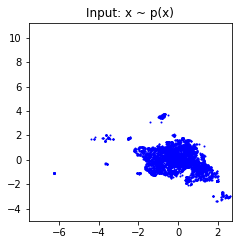

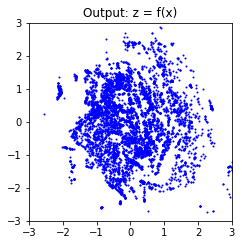

====> Test set loss: -0.0737


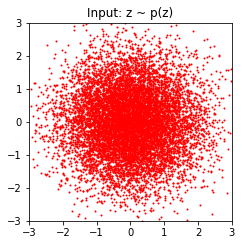

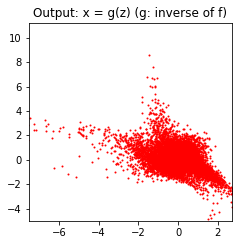

Train Epoch: 2 [0/29000 (0%)]	Loss: -0.073061
Train Epoch: 2 [6400/29000 (22%)]	Loss: -0.073580
Train Epoch: 2 [12800/29000 (44%)]	Loss: -0.075029
Train Epoch: 2 [19200/29000 (66%)]	Loss: -0.073038
Train Epoch: 2 [25600/29000 (88%)]	Loss: -0.074886
====> Epoch: 2 Average loss: -0.0742


====> Test set loss: -0.0752


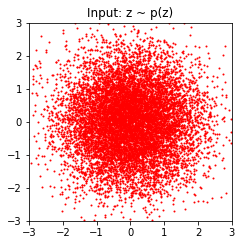

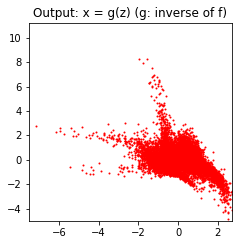

Train Epoch: 3 [0/29000 (0%)]	Loss: -0.074875
Train Epoch: 3 [6400/29000 (22%)]	Loss: -0.075604
Train Epoch: 3 [12800/29000 (44%)]	Loss: -0.074612
Train Epoch: 3 [19200/29000 (66%)]	Loss: -0.073701
Train Epoch: 3 [25600/29000 (88%)]	Loss: -0.074163
====> Epoch: 3 Average loss: -0.0750


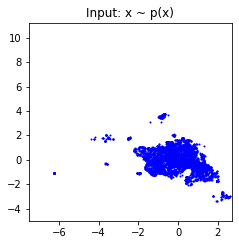

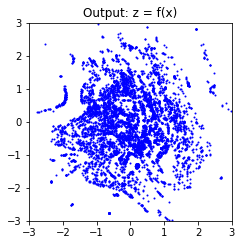

====> Test set loss: -0.0757


Train Epoch: 4 [0/29000 (0%)]	Loss: -0.075544
Train Epoch: 4 [6400/29000 (22%)]	Loss: -0.075100
Train Epoch: 4 [12800/29000 (44%)]	Loss: -0.075029
Train Epoch: 4 [19200/29000 (66%)]	Loss: -0.074555
Train Epoch: 4 [25600/29000 (88%)]	Loss: -0.074897
====> Epoch: 4 Average loss: -0.0752


====> Test set loss: -0.0756


Train Epoch: 5 [0/29000 (0%)]	Loss: -0.074839
Train Epoch: 5 [6400/29000 (22%)]	Loss: -0.074422
Train Epoch: 5 [12800/29000 (44%)]	Loss: -0.075066
Train Epoch: 5 [19200/29000 (66%)]	Loss: -0.075297
Train Epoch: 5 [25600/29000 (88%)]	Loss: -0.074394
====> Epoch: 5 Average loss: -0.0754


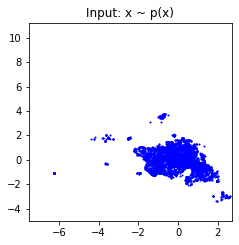

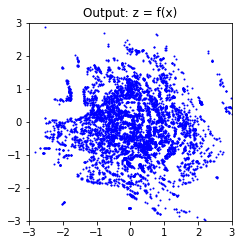

====> Test set loss: -0.0759


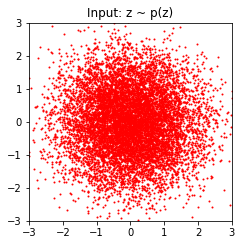

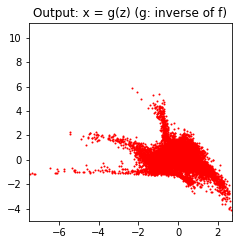

Train Epoch: 6 [0/29000 (0%)]	Loss: -0.076169
Train Epoch: 6 [6400/29000 (22%)]	Loss: -0.074946
Train Epoch: 6 [12800/29000 (44%)]	Loss: -0.074620
Train Epoch: 6 [19200/29000 (66%)]	Loss: -0.075768
Train Epoch: 6 [25600/29000 (88%)]	Loss: -0.076330
====> Epoch: 6 Average loss: -0.0756


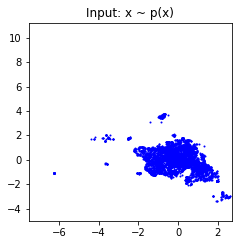

====> Test set loss: -0.0762


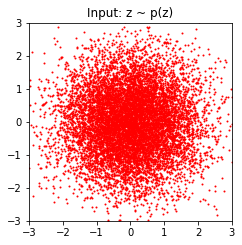

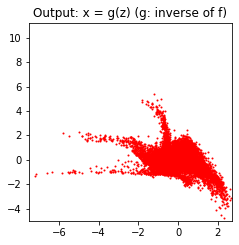

Train Epoch: 7 [0/29000 (0%)]	Loss: -0.074826
Train Epoch: 7 [6400/29000 (22%)]	Loss: -0.076035
Train Epoch: 7 [12800/29000 (44%)]	Loss: -0.075743
Train Epoch: 7 [19200/29000 (66%)]	Loss: -0.075254
Train Epoch: 7 [25600/29000 (88%)]	Loss: -0.075941
====> Epoch: 7 Average loss: -0.0757


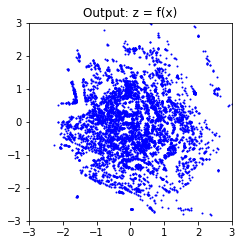

====> Test set loss: -0.0762


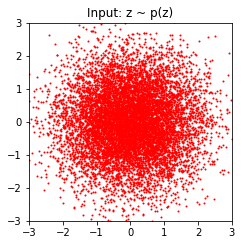

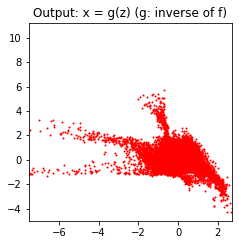

Train Epoch: 8 [0/29000 (0%)]	Loss: -0.075431
Train Epoch: 8 [6400/29000 (22%)]	Loss: -0.074839
Train Epoch: 8 [12800/29000 (44%)]	Loss: -0.075076
Train Epoch: 8 [19200/29000 (66%)]	Loss: -0.075167
Train Epoch: 8 [25600/29000 (88%)]	Loss: -0.074997


KeyboardInterrupt: 

In [3]:
for epoch in range(1,EPOCHS+1):
    train(epoch,model, prior_z, train_loader, optimizer)
    test(epoch, model, prior_z, test_loader)
    sample(epoch, model, prior_z)